In [1]:
# Further analysis of decoupled questions

**Questions to be answered:**
- 4.1: Why less electrolysis capacity in EXP? shouldn't this have more as the strategy is wind > hydrogen and it has more wind?)
- 4.2: What is interesting is, that electrolysis which is an adjustable technology is also still producing at these high prices. (special case), Why is electrolysis producing the whole year?
- 4.2: Why are the capacity factors exactly the same for some regions (hydro in Norway?)
- 4.2: How is it that V2G has only so low generation when they discharge by 0.2 and have a max capacity of 200 times the one as the battery??? Is this plot over-representing V2G? Fig. 4.19
- 4.2: Reasons why some regions do not need peak plants at all: Iberian Peninsula: warm winters and therefore no need for CHP plants, British islands: enough wind power? but they have OCGT, scandinavia: enough hydro power?}
- 4.3: This effect is also present in the correlation of market values and generation which is -0.37 in the STST case and -0.08 in the EXP case. More transmission reduces the locality of market values and reduces the impact of the location of the generation on the market values. This leads to a smaller range and therefore a more evenly distribution.
- 5.1: Why no SMR CC in EXP? Why much more Sabatier in STST?} Weil stst methan aus sabatier im gas netz transportiert und somit die netzrestriktionen reduziert. Es kommt vor, dass methan produziert wird dann woanders hingepiped und dann wieder verbrannt wird. -> zeige, dass methane in GB produziert und woanders genutzt wird? Also ins Gasnetz eingespeist wird.
- 5.1: (How is it possible that electrolysis is temporally negative correlated with PHS and PHS (con)? )
- 5.2: Capacity factors: Fig. 5.8. Why are the values for Sweden and Norway so high in STST? Why is the generation weighted capacity factor in STST and EXP the same?? How is teh difference in capacity factors in the major producing regions? Maybe the capacity factors are less for EXP there because the capacity is higher there?
- 5.2: (What is all the additional methane in STST used for?)
- 5.2: Relationship of capacity factors and VRE generation: Frischmuth adn Härtel find a positive correlation. I find a negative correlation. Does that make sense?
- 5.2: Make hydrogen storage flow analysis again!
- 5.3: Distribution of congestion rent? Reasons behind?

## Imports

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import pypsa
import math
import seaborn as sns
import cartopy
import cartopy.crs as ccrs
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
from shapely.geometry import Point, LineString
import matplotlib.patheffects as pe
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from datetime import date, datetime, time, timedelta

# imported own functions
from utils import generation_links_bus, congestion_rent_link

# imported own definitions
from utils import carrier_colors, carrier_renaming, carrier_renaming_reverse, c_tags
from utils import resistive_heater, gas_boiler, heat_pump,water_tanks_charger, water_tanks_discharger, solar_thermal
from utils import c_el_gen_s, c_el_con_s, c_h2_gen, c_h2_con
from utils import convert_ISO_3166_2_to_1

# general variables
font1 = {'fontname': 'Calibri'}
PLOT_DIR = 'C:/Users/Julian/Studies/Master/01 TU Berlin/3. Semester - Masterarbeit/MA Marktwerte FEE/data/plots/01_general/5.3_hydrogen_mv'
onshore_regions = gpd.read_file("../data/external/regions_onshore_elec_s_181.geojson")
offshore_regions = gpd.read_file("../data/external/regions_offshore_elec_s_181.geojson")
onshore_regions = onshore_regions.set_index('name')
offshore_regions = offshore_regions.set_index('name')

# Notebook Definitions
c1_groups = [resistive_heater, gas_boiler, heat_pump, water_tanks_charger, water_tanks_discharger, solar_thermal]
c1_groups_name = ["resistive heater", "gas boiler", "heat pump", "water tanks charger", "water tanks discharger",
                  "solar thermal"]
markers = ["v", "^", "<", ">", "1", "2", "3", "4", "*", "+", "d", "o", "|", "s", "P", "p", "h"]

# new indices: cut off Fuel cell and SMR completely and SMR CC for exp
c_h2_gen_stst = ['H2 Electrolysis', 'SMR CC']
c_h2_gen_exp = ['H2 Electrolysis']
c_h2_gen = ['H2 Electrolysis', 'SMR CC']
c_h2_con = ['H2 liquefaction', 'Sabatier', 'Fischer-Tropsch']

In [3]:
# Network imports
stst = pypsa.Network("../data/raw/elec_s_181_lv1.0__Co2L0-3H-T-H-B-I-A-solar+p3-linemaxext10-noH2network_2030.nc")
exp = pypsa.Network("../data/raw/elec_s_181_lvopt__Co2L0-3H-T-H-B-I-A-solar+p3-linemaxext10_2030.nc")

Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 20, 1], imported network file PyPSA version [0, 18, 1].

INFO:pypsa.io:Imported network elec_s_181_lv1.0__Co2L0-3H-T-H-B-I-A-solar+p3-linemaxext10-noH2network_2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 20, 1], imported network file PyPSA version [0, 18, 1].

INFO:pypsa.io:Imported network elec_s_181_lvopt__Co2L0-3H-T-H-B-I-A-solar+p3-linemaxext10_2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [4]:
# stst and exp dataframes
# spatial
df_stst_ons = pd.read_pickle("../data/processed/df_stst_ons.pkl")
df_stst_off = pd.read_pickle("../data/processed/df_stst_off.pkl")
df_exp_ons = pd.read_pickle("../data/processed/df_exp_ons.pkl")
df_exp_off = pd.read_pickle("../data/processed/df_exp_off.pkl")

# temporal
df_stst_ts = pd.read_pickle("../data/processed/df_stst_ts.pkl")
df_exp_ts = pd.read_pickle("../data/processed/df_exp_ts.pkl")

In [5]:
# Notebook Functions



In [6]:
#assert 0

## shadow prices

In [7]:
stst.generators_t.mu_upper.loc[: , stst.generators.carrier == "onwind"]
#stst.links_t.mu_upper.loc[: , stst.links.carrier == "H2 Electrolysis"]

Generator,AL0 0 onwind,AT0 0 onwind,AT0 1 onwind,AT0 2 onwind,BA0 0 onwind,BE0 0 onwind,BE0 1 onwind,BE0 2 onwind,BE0 3 onwind,BE0 4 onwind,...,SE3 0 onwind,SE3 1 onwind,SE3 2 onwind,SE3 3 onwind,SE3 4 onwind,SE3 5 onwind,SE3 6 onwind,SE3 7 onwind,SI0 0 onwind,SK0 0 onwind
snapshot,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,624.190593,583.357869,7128.965737,2989.306860,617.093792,149.769510,245.776782,288.361060,246.762836,319.533507,...,105.714778,117.756768,178.578372,0.000748,423.729326,176.753681,194.205765,146.649458,1034.031078,355.173826
2013-01-01 03:00:00,624.013171,583.836799,10081.634336,516.411398,616.905719,149.783134,260.336458,288.357354,258.745825,303.093511,...,71.170811,87.406548,150.934380,0.001461,364.839654,172.099763,194.232996,116.136291,1094.541494,355.173013
2013-01-01 06:00:00,461.347271,552.852221,16529.480049,488.183867,511.149663,149.786543,257.455042,288.366064,260.120035,310.992495,...,98.387161,111.247940,184.773588,42.467937,371.411534,279.487096,194.229098,130.821509,956.370833,340.924436
2013-01-01 09:00:00,269.387319,280.614425,269.244748,266.800828,280.792848,149.775751,249.874873,280.608857,260.155829,303.107478,...,119.407752,118.343418,243.867222,119.527397,449.598709,373.192975,119.606500,145.510688,838.576056,0.001154
2013-01-01 12:00:00,459.941064,521.559179,290.336412,463.295277,506.484848,107.525709,249.943664,280.608594,271.385334,303.057394,...,188.639220,188.641752,340.594276,188.638774,909.841160,720.398427,188.641352,230.064188,676.227231,280.618311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 09:00:00,599.456593,533.635997,89.694530,516.409199,595.149705,0.004048,194.955423,280.604010,210.118923,320.735711,...,119.377436,127.740452,141.196718,96.404612,272.557617,132.705588,169.792944,197.290619,573.075400,355.194198
2013-12-31 12:00:00,599.488842,537.467992,269.222333,516.412329,590.612548,23.565544,225.798024,280.608294,247.366118,320.731797,...,131.372846,135.747010,146.840970,110.324561,215.477553,151.025572,169.741490,157.312435,546.889137,355.758124
2013-12-31 15:00:00,624.533853,552.849709,354.450139,538.000272,619.606206,149.764549,225.801792,288.365302,253.467483,334.163681,...,131.398382,135.770293,148.422143,110.338742,233.840109,155.736212,169.795180,149.952267,594.066213,370.649516


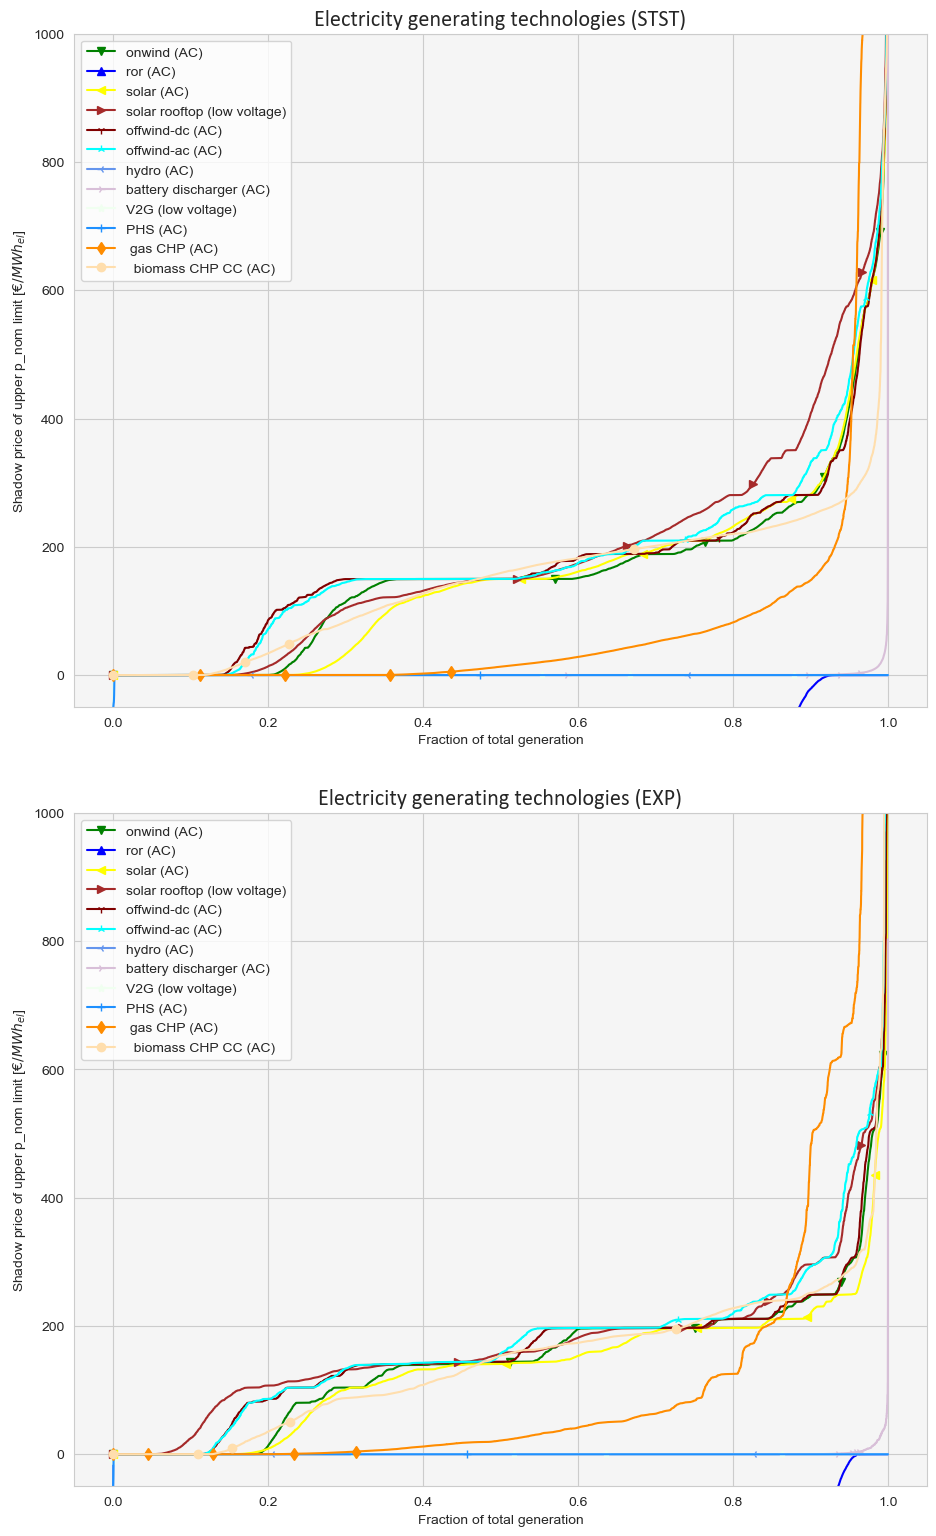

In [8]:
carriers = ["onwind", "ror", "solar", "solar rooftop", "offwind-dc", "offwind-ac", "hydro", "battery discharger",  "V2G", "PHS" , "urban central gas CHP", "urban central solid biomass CHP CC"]

fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(10, 2*8))

for n, ax, model in zip([stst,exp], axs.reshape(-1), ["STST", "EXP"]):

    for c in carriers:
        if c in n.generators.carrier.unique():
            c_bus = n.generators[n.generators.carrier == c].bus.map(n.buses.carrier).unique()[0]
            gen = n.generators_t.p.loc[: , n.generators.carrier == c]
            mu_up = n.generators_t.mu_upper.loc[:, gen.columns]
            df = pd.concat([pd.DataFrame(mu_up.values.flatten()) , pd.DataFrame(gen.values.flatten())], axis=1)

        elif c in n.links.carrier.unique():
            c_bus = n.links[n.links.carrier == c]["bus1"].map(n.buses.carrier).unique()[0]
            gen = n.links_t.p1.loc[: , n.links.carrier == c]
            mu_up = n.links_t.mu_upper.loc[:, gen.columns]
            df = pd.concat([pd.DataFrame(mu_up.values.flatten()) , pd.DataFrame(gen.values.flatten())], axis=1)

        elif c in n.storage_units.carrier.unique():
            c_bus = n.storage_units[n.storage_units.carrier == c].bus.map(n.buses.carrier).unique()[0]
            gen = n.storage_units_t.p_dispatch.loc[: , n.storage_units.carrier == c]
            mu_up = n.storage_units_t.mu_upper.loc[:, gen.columns]
            df = pd.concat([pd.DataFrame(mu_up.values.flatten()) , pd.DataFrame(gen.values.flatten())], axis=1)

        df.columns = ["mu_up" , "gen"]
        df = df.sort_values(by="mu_up")
        df["gen_cumsum"] = df["gen"].cumsum()
        df["gen_cumsum_norm"] = df["gen"].cumsum() / df["gen"].sum()
        ax.plot(df["gen_cumsum_norm"], df["mu_up"], color=carrier_colors[c], label= f"{c.replace('urban central', '').replace('solid', '')} ({c_bus})",
                marker=markers[carriers.index(c)], markevery=2920*40)
        ax.set_ylim([-50, 1000])
        ax.set_ylabel("Shadow price of upper p_nom limit [$€/MWh_{el}$]")
        ax.set_xlabel("Fraction of total generation")
        ax.set_facecolor("whitesmoke")
        ax.set_title(f"Electricity generating technologies ({model})", fontsize=16, **font1)
        ax.legend()

fig.tight_layout(pad=3)
plt.show()

# fig.savefig(f"{PLOT_DIR}/el_gen_w_mu_up_within_models.png")

# why is mu_upper negative for storage units?

## regions plot

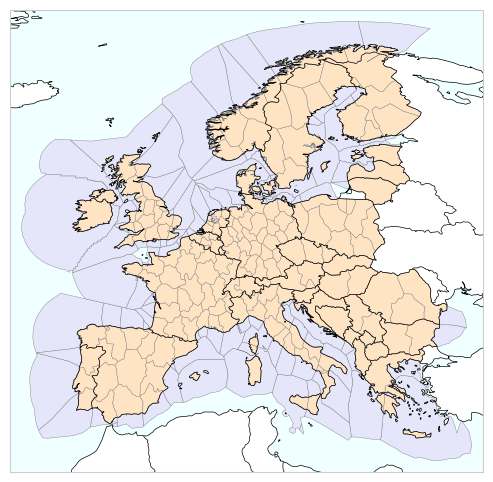

In [9]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.EqualEarth()},
                        figsize=(7, 6))
crs = ccrs.EqualEarth()


ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
ax.coastlines(edgecolor='black', linewidth=0.5)
ax.set_facecolor('white')
ax.add_feature(cartopy.feature.OCEAN, color='azure')

df_stst_ons.to_crs(crs.proj4_init).plot(ax=ax,
                                        linewidth=0.3,
                                        facecolor="bisque",
                                        edgecolor = 'grey')

df_stst_off.to_crs(crs.proj4_init).plot(ax=ax,
                                        linewidth=0.3,
                                        facecolor="lavender",
                                        edgecolor = 'grey')


# always select same section
xmin, ymin, xmax, ymax = df_stst_off.to_crs(crs.proj4_init).total_bounds
pad = 1 * 1e5  # add a padding around the geometry
ax.set_xlim(xmin-pad, xmax+pad)
ax.set_ylim(ymin-pad, ymax+pad)

plt.show()

fig.savefig(f"C:/Users/Julian/Studies/Master/01 TU Berlin/3. Semester - Masterarbeit/MA Marktwerte FEE/data/plots/01_general/regions.png")